# Answer 3 [Programming Question] : MAP and ML estimation of Poisson Distribution (Modeling the horse kick deaths)

### Importing Libraries

In [1]:
import pandas as pd
from scipy.special import factorial
import scipy as scy
import scipy.stats as stats
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

Given data is divided in training data(13 years) and test data(7 years) 

Training Data : 1875 to 1887 to model the Poisson distribtion.
Test Data : 1888 to 1894 to test the model.

### Importing Training data

In [2]:
training = pd.read_csv('training_set.csv', index_col = 'YEAR')
training

,G,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XIV,XV
YEAR,,,,,,,,,,,,,,
1875,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1876,2,0,0,0,1,0,0,0,0,0,0,0,1,1
1877,2,0,0,0,0,0,1,1,0,0,1,0,2,0
1878,1,2,2,1,1,0,0,0,0,0,1,0,1,0
1879,0,0,0,1,1,2,2,0,1,0,0,2,1,0
1880,0,3,2,1,1,1,0,0,0,2,1,4,3,0
1881,1,0,0,2,1,0,0,1,0,1,0,0,0,0
1882,1,2,0,0,0,0,1,0,1,1,2,1,4,1
1883,0,0,1,2,0,1,2,1,0,1,0,3,0,0


### Importing Test data

In [3]:
test_data = pd.read_csv('test_set.csv' ,index_col = 'YEAR')
test_data

,G,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XIV,XV
YEAR,,,,,,,,,,,,,,
1888,0,1,1,0,0,1,1,0,0,0,0,1,1,0
1889,0,0,1,1,0,1,1,0,0,1,2,2,0,2
1890,1,2,0,2,0,1,1,2,0,2,1,1,2,2
1891,0,0,0,1,1,1,0,1,1,0,3,3,1,0
1892,1,3,2,0,1,1,3,0,1,1,0,1,1,0
1893,0,1,0,0,0,1,0,2,0,0,1,3,0,0
1894,1,0,0,0,0,0,0,0,1,0,1,1,0,0


In [4]:
headings = list(test_data)
print(headings)

['G', 'I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XIV', 'XV']


### important stats of training data

In [5]:
training.describe()

,G,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XIV,XV
count,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,1.0,0.692308,0.615385,0.615385,0.461538,0.384615,0.846154,0.538462,0.307692,0.692308,0.538462,1.000000,1.461538,0.307692
std,1.0,1.031553,0.869718,0.767948,0.518875,0.650444,0.987096,0.660225,0.480384,0.751068,0.776250,1.290994,1.265924,0.480384
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,2.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,3.0,3.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,4.000000,1.000000


The given data has been modeled using Poisson distribution.

### Poisson Distribution: 
PDF for poissons is given as
\begin{align}
p(\text{k events in interval}) = \frac{e^{-\lambda}\lambda^k}{k!}
\end{align}
where $\lambda$ is the average (mean) no of events per interval and $k$ is no of events occured independently.

### Part 1:  MLE to learn the parameters

Let $X_1,X_2,......,X_n$ are independent Poisson random variables each having mean $\lambda$, then maximum likelihood estimator(MLE) of $\lambda$ can be given as

\begin{align}
\hat\lambda_{ML} = \frac{\sum_{1}^{n}x_i}{n}
\end{align}

#### Example:
For G-Corps $\hat\lambda_{ML}$ estimate will be
\begin{align}
\hat\lambda_{ML} = \frac{0+2+2+1+0+0+1+1+0+3+0+2+1}{13} = 1
\end{align}

In [6]:
list1 = list(training.mean())
lambdaForEachCorps= pd.DataFrame([training.mean()],index = ['MLE (λ)'] ,columns = headings)
display(lambdaForEachCorps)

,G,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XIV,XV
MLE (λ),1.0,0.692308,0.615385,0.615385,0.461538,0.384615,0.846154,0.538462,0.307692,0.692308,0.538462,1.0,1.461538,0.307692


we use MLE ($\hat\lambda_{ML}$), to predict no of deaths for remaining 7 years.


#### Example:
For G-Corps
\begin{align}
p (\text{0 deaths in 7 years}) = \frac{e^{-1}1^0}{0!}*7 = 3
\end{align}

In [7]:
summed1 = 0
for idx, i in enumerate(list1):
    t = np.arange(0, 5, 1)
    d = np.exp(-i)*np.power(i, t)/factorial(t)
    pred = d*7
    
    actual_for_thisYear=(list(test_data[headings[idx]]))
    
    sum1=0
    
    predictedList = []
    
    actualList = []

    for idx2, num in enumerate(pred):
        a=round(num)
        predictedList.append(a)
        
        b=actual_for_thisYear.count(idx2)
        actualList.append(b)
        
        mse= round(np.power((a-b),2)/7,2)
        
        sum1 = sum1 + mse
        
    
    RMSE = round(np.power(sum1,0.5),2)
    sum1 = pd.DataFrame([[sum1 , RMSE]], index = [f'For {headings[idx]} corp'], columns = ['MSE','RMSE'])
    summed1 = summed1 +RMSE    
    prediction= pd.Series(predictedList)
    actual= pd.Series(actualList)
    df = pd.DataFrame([predictedList,actualList], index =[ f'PREDICTION for {headings[idx]} corp',
                                                           f'ACTUAL for {headings[idx]} corp'],
                                                columns= ['yearsWithZeroDeath','yearsWithOneDeath',
                                                            'yearsWithTwoDeath','yearsWithThreeDeath',
                                                          'yearsWithFourDeath'])
    
    display(df)
    display(sum1)
    print('---------------------------------------------------------------------------------------')
print(summed1)

,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for G corp,3,3,1,0,0
ACTUAL for G corp,4,3,0,0,0


,MSE,RMSE
For G corp,0.28,0.53


---------------------------------------------------------------------------------------


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for I corp,4,2,1,0,0
ACTUAL for I corp,3,2,1,1,0


,MSE,RMSE
For I corp,0.28,0.53


---------------------------------------------------------------------------------------


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for II corp,4,2,1,0,0
ACTUAL for II corp,4,2,1,0,0


,MSE,RMSE
For II corp,0.0,0.0


---------------------------------------------------------------------------------------


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for III corp,4,2,1,0,0
ACTUAL for III corp,4,2,1,0,0


,MSE,RMSE
For III corp,0.0,0.0


---------------------------------------------------------------------------------------


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for IV corp,4,2,0,0,0
ACTUAL for IV corp,5,2,0,0,0


,MSE,RMSE
For IV corp,0.14,0.37


---------------------------------------------------------------------------------------


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for V corp,5,2,0,0,0
ACTUAL for V corp,1,6,0,0,0


,MSE,RMSE
For V corp,4.58,2.14


---------------------------------------------------------------------------------------


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for VI corp,3,3,1,0,0
ACTUAL for VI corp,3,3,0,1,0


,MSE,RMSE
For VI corp,0.28,0.53


---------------------------------------------------------------------------------------


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for VII corp,4,2,1,0,0
ACTUAL for VII corp,4,1,2,0,0


,MSE,RMSE
For VII corp,0.28,0.53


---------------------------------------------------------------------------------------


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for VIII corp,5,2,0,0,0
ACTUAL for VIII corp,4,3,0,0,0


,MSE,RMSE
For VIII corp,0.28,0.53


---------------------------------------------------------------------------------------


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for IX corp,4,2,1,0,0
ACTUAL for IX corp,4,2,1,0,0


,MSE,RMSE
For IX corp,0.0,0.0


---------------------------------------------------------------------------------------


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for X corp,4,2,1,0,0
ACTUAL for X corp,2,3,1,1,0


,MSE,RMSE
For X corp,0.85,0.92


---------------------------------------------------------------------------------------


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for XI corp,3,3,1,0,0
ACTUAL for XI corp,0,4,1,2,0


,MSE,RMSE
For XI corp,2.0,1.41


---------------------------------------------------------------------------------------


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for XIV corp,2,2,2,1,0
ACTUAL for XIV corp,3,3,1,0,0


,MSE,RMSE
For XIV corp,0.56,0.75


---------------------------------------------------------------------------------------


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for XV corp,5,2,0,0,0
ACTUAL for XV corp,5,0,2,0,0


,MSE,RMSE
For XV corp,1.14,1.07


---------------------------------------------------------------------------------------
9.310000000000002


### 2) Using maximum aposteriori estimation to learn parameters

**a) Prior Assumption:**  Gamma Distribution with parameters shape($\alpha$) = 2.5 and rate($\beta$) = 1 $$\lambda~~\sim~~~  \Gamma(\alpha, \beta)$$
* Justification: 
given distribution is Poisson distribution which supports interval from 0 to $\infty$ and the rate of deaths per year $\approx$ 1.

Hence we have choosen gamma distribution as the prior distribution, which supports from interval 0 to $\infty$ and the rate($\beta$) parameter =1 and shape($\alpha$) =2

The pdf of gamma distribution can be given as
$$f(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta\lambda}$$

#### Maximum A-posteriori (MAP) Estimation:
$$ prob(\lambda|y) = \frac{prob(y|\lambda).prob(\lambda)}{prob(y)}$$
$$ \hat\lambda_{MAP} = \underset{\lambda}{argmax} (\prod prob(y|\lambda).prob(\lambda) )$$
Using Loglokelihood
$$ \hat\lambda_{MAP} = \underset{\lambda}{argmax} (\sum \log prob(y|\lambda) + \log prob(\lambda)) $$
by substituting likelihood and prior distributions
$$\hat\lambda_{MAP} = \underset{\lambda}{argmax} (\sum \log (\lambda^{\sum{y_i}}e^{-n\lambda}) + \log (\beta^\alpha \lambda^{\alpha-1}e^{-\beta\lambda})$$
$$\hat\lambda_{MAP} = \underset{\lambda}{argmax} (\log (\lambda^{\sum{y_i}}e^{-n\lambda}) + \log (\beta^\alpha \lambda^{\alpha-1}e^{-\beta\lambda})$$
MAP estimate will be obtained by equating the gradient of above eq to 0.

$$\frac{\alpha-1}{\lambda}-\beta+\frac{\sum{y_i}}{\lambda}-n = 0$$

$$\therefore \hat\lambda_{MAP} = \frac{\alpha+\sum{y_i}-1}{\beta+n}$$


#### Example:
For G-Corps
\begin{align}
\hat\lambda_{MAP} = \frac{2.5+(0+2+2+1+0+0+1+1+0+3+0+2+1)-1}{1+13} = 1.035
\end{align}

we use ($\hat\lambda_{MAP}$), to predict no of deaths for remaining 7 years.




\begin{align}
p (\text{k deaths in 7 years}) = \frac{e^{-\hat\lambda_{MAP}}{\hat\lambda_{MAP}}^k}{k!}*7
\end{align}

In [8]:
α = 2.5
β = 1
lambdaForMAP = []
for i in training:
    sum1 = np.sum(training[i])
    n = len(training)
    lambdaForMAP.append((α + sum1 -1)/(β+n))
lambdaMAPForEachCorps= pd.DataFrame([lambdaForMAP], index = ['MAP (λ)'] ,columns = headings)
display(lambdaMAPForEachCorps)

,G,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XIV,XV
MAP (λ),1.035714,0.75,0.678571,0.678571,0.535714,0.464286,0.892857,0.607143,0.392857,0.75,0.607143,1.035714,1.464286,0.392857


In [9]:
summed =0
for idx, i in enumerate(lambdaForMAP):
    t = np.arange(0, 5, 1)
    d = np.exp(-i)*np.power(i, t)/factorial(t)
    pred1 = d*7
    
    actual_for_thisYear=(list(test_data[headings[idx]]))
    
    sum11=0
    
    predictedListMAP = []
    
    actualList = []

    for idx2, num in enumerate(pred1):
        a=round(num)
        predictedListMAP.append(a)
        
        b=actual_for_thisYear.count(idx2)
        actualList.append(b)
        
        mse= round(np.power((a-b),2)/7,2)
        
        sum11 = sum11 + mse
        
    
    RMSE = round(np.power(sum11,0.5),2)
    summed = summed +RMSE
    sum11 = pd.DataFrame([[sum11 , RMSE]], index = [f'For {headings[idx]} corp'], columns = ['MSE','RMSE'])
        
    prediction= pd.Series(predictedListMAP)
    actual= pd.Series(actualList)
    df1 = pd.DataFrame([predictedListMAP,actualList], index =[ f'PREDICTION for {headings[idx]} corp',
                                                           f'ACTUAL for {headings[idx]} corp'],
                                                columns= ['yearsWithZeroDeath','yearsWithOneDeath',
                                                            'yearsWithTwoDeath','yearsWithThreeDeath',
                                                          'yearsWithFourDeath'])
    
    display(df1)
    display(sum11)
print(summed)

,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for G corp,2,3,1,0,0
ACTUAL for G corp,4,3,0,0,0


,MSE,RMSE
For G corp,0.71,0.84


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for I corp,3,2,1,0,0
ACTUAL for I corp,3,2,1,1,0


,MSE,RMSE
For I corp,0.14,0.37


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for II corp,4,2,1,0,0
ACTUAL for II corp,4,2,1,0,0


,MSE,RMSE
For II corp,0.0,0.0


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for III corp,4,2,1,0,0
ACTUAL for III corp,4,2,1,0,0


,MSE,RMSE
For III corp,0.0,0.0


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for IV corp,4,2,1,0,0
ACTUAL for IV corp,5,2,0,0,0


,MSE,RMSE
For IV corp,0.28,0.53


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for V corp,4,2,0,0,0
ACTUAL for V corp,1,6,0,0,0


,MSE,RMSE
For V corp,3.58,1.89


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for VI corp,3,3,1,0,0
ACTUAL for VI corp,3,3,0,1,0


,MSE,RMSE
For VI corp,0.28,0.53


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for VII corp,4,2,1,0,0
ACTUAL for VII corp,4,1,2,0,0


,MSE,RMSE
For VII corp,0.28,0.53


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for VIII corp,5,2,0,0,0
ACTUAL for VIII corp,4,3,0,0,0


,MSE,RMSE
For VIII corp,0.28,0.53


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for IX corp,3,2,1,0,0
ACTUAL for IX corp,4,2,1,0,0


,MSE,RMSE
For IX corp,0.14,0.37


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for X corp,4,2,1,0,0
ACTUAL for X corp,2,3,1,1,0


,MSE,RMSE
For X corp,0.85,0.92


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for XI corp,2,3,1,0,0
ACTUAL for XI corp,0,4,1,2,0


,MSE,RMSE
For XI corp,1.28,1.13


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for XIV corp,2,2,2,1,0
ACTUAL for XIV corp,3,3,1,0,0


,MSE,RMSE
For XIV corp,0.56,0.75


,yearsWithZeroDeath,yearsWithOneDeath,yearsWithTwoDeath,yearsWithThreeDeath,yearsWithFourDeath
PREDICTION for XV corp,5,2,0,0,0
ACTUAL for XV corp,5,0,2,0,0


,MSE,RMSE
For XV corp,1.14,1.07


9.46


Since the Posteriori will be a Gamma distribution 
$$\lambda~~\sim~~~  \Gamma(\alpha+\sum{y_i}, \beta+n) $$
The values of shape and rate parameters calculated each Crop wise.

### Mode for MLE,Mode for Prior and Mode for MAP are calculated below 

In [10]:
modeForMLE = np.floor(list1)
#print(modeForMLE)

mode = For non-integer λ, it is the largest integer less than λ. For integer λ, x = λ and x = λ - 1 are both the mode.

In [11]:
modeForPrior = []
for i in training:
    modePrior = round((α-1) / β , 2)
    modeForPrior.append(modePrior)
#print(modeForPrior)

In [12]:
modeForMAP = [ round(elem, 2) for elem in lambdaForMAP]
#print(modeForMAP)

In [13]:
mode = pd.DataFrame([modeForMLE,modeForPrior,modeForMAP], index = ['Mode For MLE','Mode For Prior','Mode For MAP'] ,
                                                        columns = headings)
display(mode)

,G,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XIV,XV
Mode For MLE,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
Mode For Prior,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50
Mode For MAP,1.04,0.75,0.68,0.68,0.54,0.46,0.89,0.61,0.39,0.75,0.61,1.04,1.46,0.39


### Part 2: Using maximum aposteriori estimation to learn parameters

------------------------------------------------------------------------------------------------------------------
* **For II - Corps:**


Likelihood mode = 0.00        prior mode = 1.5        Posteriori mode = 0.68

mode of Posteriori distribution is in between likelihood and prior distributions

##### Posterior,Likelihood and Prior for Number of Deaths for II corp

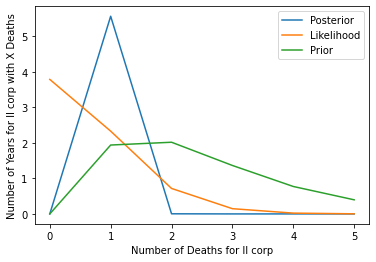

In [14]:
x= np.arange(0.0,6.0,1)

#a=plt.plot(x, poisson.pmf(x,lambdaForMAP[2]),label='Posterior')
a=plt.plot(x, 7*stats.gamma.pdf(x,a= α + np.sum(training["II"]) , scale=1/(β+13) ),label='Posterior')
b=plt.plot(x, 7*poisson.pmf(x,list1[2]),label='Likelihood')
c=plt.plot(x, 7*stats.gamma.pdf(x, a=α, scale=1/β),label='Prior')
plt.legend()
plt.xlabel('Number of Deaths for II corp')
plt.ylabel('Number of Years for II corp with X Deaths')
plt.show()

-------------------------------------------------------------------------------------------------

* **For IV - Corps:**


Likelihood mode = 0.00        prior mode = 1.5        Posteriori mode = 0.54

mode of Posteriori distribution is in between likelihood and prior distributions

##### Posterior,Likelihood and Prior for Number of Deaths for IV corp

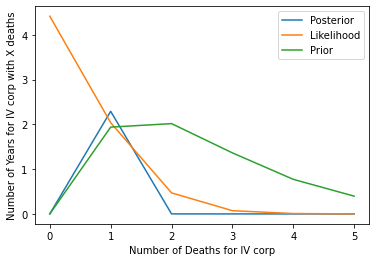

In [15]:
x= np.arange(0.0,6.0,1)

#a=plt.plot(x, poisson.pmf(x,lambdaForMAP[4]),label='Posterior')
a=plt.plot(x, 7*stats.gamma.pdf(x,a= α + np.sum(training["IV"]) , scale=1/(β+13) ),label='Posterior')
b=plt.plot(x, 7*poisson.pmf(x,list1[4]),label='Likelihood')
c=plt.plot(x, 7*stats.gamma.pdf(x, a=α, scale=1/β),label='Prior')
plt.legend()
plt.xlabel('Number of Deaths for IV corp')
plt.ylabel('Number of Years for IV corp with X deaths')
plt.show()

-------------------------------------------------------------------------------------------------

* **For VI - Corps:**


Likelihood mode = 0.00        prior mode = 1.5        Posteriori mode = 0.89

mode of Posteriori distribution is in between likelihood and prior distributions

#### Posterior,Likelihood and Prior for Number of Deaths for VI corp

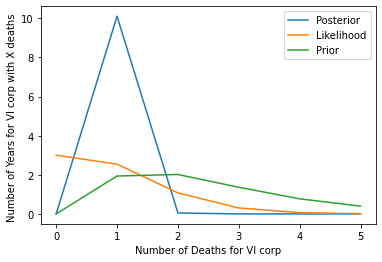

In [16]:
x= np.arange(0.0,6.0,1)

#a=plt.plot(x, poisson.pmf(x,lambdaForMAP[6]),label='Posterior')
a=plt.plot(x, 7*stats.gamma.pdf(x,a= α + np.sum(training["VI"]) , scale=1/(β+13) ),label='Posterior')
b=plt.plot(x, 7*poisson.pmf(x,list1[6]),label='Likelihood')
c=plt.plot(x, 7*stats.gamma.pdf(x, a=α, scale=1/β),label='Prior')
plt.legend()
plt.xlabel('Number of Deaths for VI corp')
plt.ylabel('Number of Years for VI corp with X deaths ')
plt.show()

.

____________________________________________________________________________________________________________________

completed by:- Shubham jain(SM20MTECH12007) and Rahul bidla(SM20MTECH12014)